In [2]:
import numpy as np
import pandas as pd
import netCDF4 as nc

In [3]:
year=np.arange(1981,2011)
ds=[]
for i in range(len(year)):
    ds.append(nc.Dataset(str('C:/Users/Armaan/OneDrive/Desktop/WORKSPACE/Datasets/NetCDF4/Jan_'+str(year[i])+'.nc')))

In [4]:
ds[1]["hmax"][3]

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-32767)

In [5]:
var=ds[1].variables.keys()
var=list(var)
var

['longitude',
 'latitude',
 'time',
 'u10',
 'v10',
 'hmax',
 'mwd',
 'mwp',
 'wmb',
 'pp1d',
 'swh',
 'shts',
 'shww']

In [6]:
var

['longitude',
 'latitude',
 'time',
 'u10',
 'v10',
 'hmax',
 'mwd',
 'mwp',
 'wmb',
 'pp1d',
 'swh',
 'shts',
 'shww']

In [7]:
lat=[]
lon=[]
hmax=[]
u10=[]
v10=[]
pp1d=[]
for i in range(len(year)):
    for j in range(37):
        lat.append(ds[i]["latitude"][j].mean())
        lon.append(ds[i]["longitude"][j].mean())
        hmax.append(ds[i]["hmax"][j].mean())
        u10.append(ds[i]["u10"][j].mean())
        v10.append(ds[i]["v10"][j].mean())
        pp1d.append(ds[i]["pp1d"][j].mean())

In [8]:
lat=np.array(lat)
lon=np.array(lon)
hmax=np.array(hmax)
lon.shape,lat.shape,hmax.shape

((1110,), (1110,), (1110,))

In [9]:
data=pd.DataFrame(lon,columns=["Longitude"])
data["Latitude"]=lat
data["Hmax"]=hmax
data

,Longitude,Latitude,Hmax
0,82.00,25.00,1.931147
1,82.25,24.75,1.934883
2,82.50,24.50,1.930437
3,82.75,24.25,1.922924
4,83.00,24.00,1.914562
...,...,...,...
1105,90.00,17.00,2.222621
1106,90.25,16.75,2.196765
1107,90.50,16.50,2.166439
1108,90.75,16.25,2.147115


In [10]:
data.to_csv('C:/Users/Armaan/Downloads/1.csv')

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import math

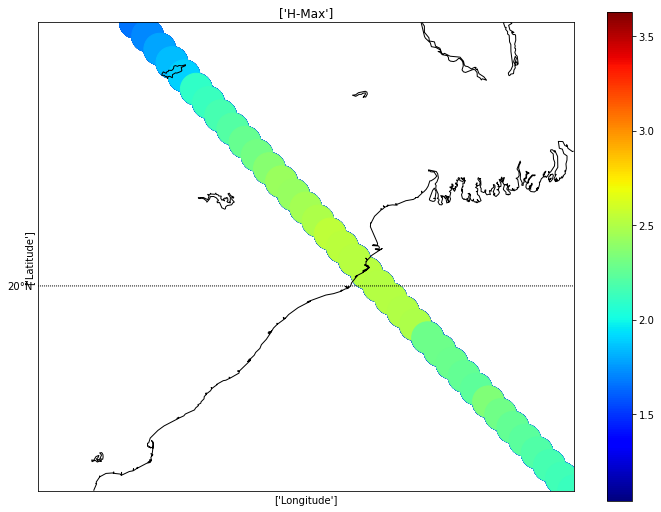

In [12]:
fig=plt.figure(figsize=(12,9))
mp=Basemap(projection='merc', llcrnrlon=80, llcrnrlat=16, urcrnrlon=91, urcrnrlat=25, resolution='i')
#long,lati = np.meshgrid(lon,lat)
#x,y=mp(lon,lat)
#c_scheme=mp.pcolormesh(lon,lat,np.squeeze(hmax),cmap='jet')
#cbar=mp.colorbar(c_scheme,location='right',pad='10%')
#plt.scatter(lon,lat,1,hmax,cmap='jet')

mp.drawcoastlines()
mp.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
mp.scatter(lon,lat,latlon=True,s=1000,c=hmax,cmap='jet')
#plt.xlim([80,90])
#plt.ylim([16,25])
plt.colorbar()
plt.xlabel(["Longitude"])
plt.ylabel(["Latitude"])
plt.title(["H-Max"])
plt.show()

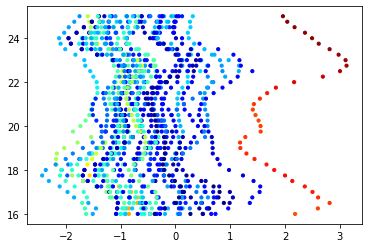

In [13]:
plt.scatter(u10,lat,c=hmax,cmap="jet",s=10)
#plt.scatter(lon,u10,c=hmax,cmap="jet",s=10)
plt.show()